# Laboratorio 1 -Modelación y Simulación-
Marco Jurado 20308 <br>
Cristian Aguirre 

### Ejercicio 1
1. Calcule e imprima la media, la varianza y la asimetría de la muestra.
2. Trace un histograma de los datos y observe su forma.
3. ¿Qué le dicen estas estadísticas sobre la tendencia central, la dispersión y la forma de los datos?

La media de la muestra es de: 0.018288687056089544
La varianza de la muestra es de: 0.9612943542460164
La asimetria de la muestra es de: -0.21100206918478176


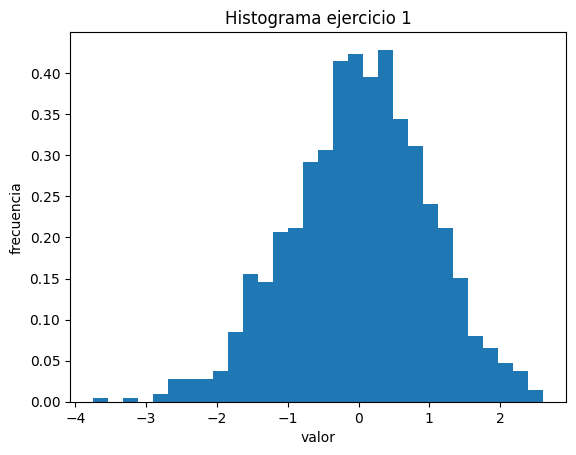

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# variables
media = 0
desv_estandar = 1
size = 1000

# normal
muestreo = np.random.normal(media, desv_estandar, size)

#tasks
media = np.mean(muestreo)
print("La media de la muestra es de:", media)

varianza = np.var(muestreo)
print("La varianza de la muestra es de:", varianza)

asimetria = skew(muestreo)
print("La asimetria de la muestra es de:", asimetria)


plt.hist(muestreo, bins=30, density=True)
plt.xlabel("valor")
plt.ylabel("frecuencia")
plt.title("Histograma ejercicio 1")
plt.show()



### Ejercicio 2
1. Trace la función de densidad de probabilidad (PDF) y la función de distribución acumulativa (CDF) de los datos.
2. Calcule e imprima las probabilidades para intervalos específicos utilizando la CDF. (por lo menos 2 intervalos a su elección)
3. ¿Qué información puede obtener de la forma del PDF y el comportamiento de la CDF?

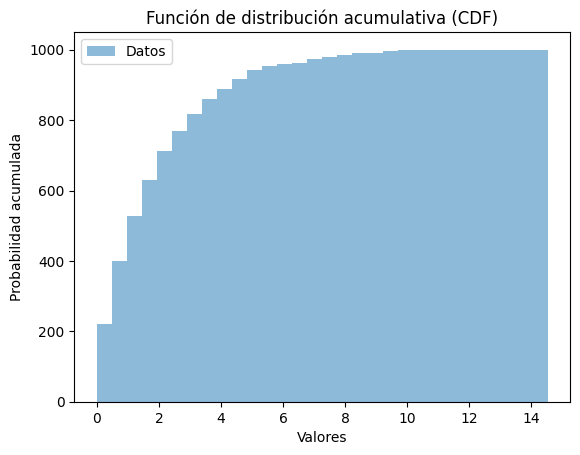

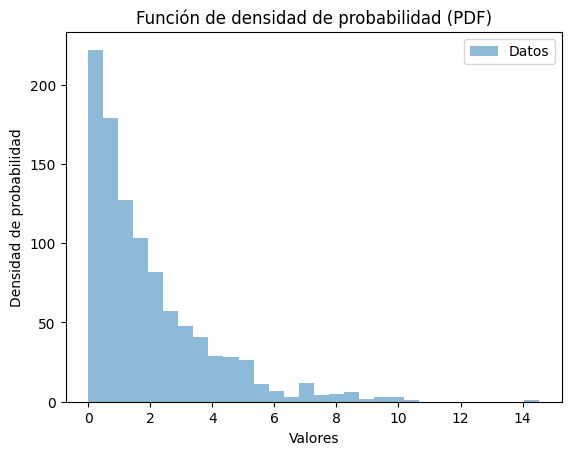

In [2]:
# variables
tasa = 0.5
size = 1000

#exponencial
muestreo = np.random.exponential(scale=1/tasa, size=size)

# Tasks
# CDF
plt.figure()
plt.hist(muestreo, bins=30, cumulative=True, alpha=0.5, label='Datos')
plt.xlabel('Valores')
plt.ylabel('Probabilidad acumulada')
plt.title('Función de distribución acumulativa (CDF)')
plt.legend()

# PDF
plt.figure()
plt.hist(muestreo, bins=30, alpha=0.5, label='Datos')
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de densidad de probabilidad (PDF)')
plt.legend()

plt.show()


In [3]:
# task 2 y 3
intervalo1 = (0, 2)
intervalo2 = (2, 4)

prob_int1 = np.sum((muestreo >= intervalo1[0]) & (muestreo < intervalo1[1])) / size
prob_int2 = np.sum((muestreo >= intervalo2[0]) & (muestreo < intervalo2[1])) / size

print(f"La probabilidad para el intervalo {intervalo1}: {prob_int1}")
print(f"La probabilidad para el intervalo {intervalo2}: {prob_int2}")


La probabilidad para el intervalo (0, 2): 0.638
La probabilidad para el intervalo (2, 4): 0.225


##### Task 3
Podemos decir que la PDF está constantemente decreciendo diciendo así que los valores pequeños tienen mayor probabilidad de ocurrir (tambien confirmado por la probabilidad del intervalo)
Así mismo de la CDF podemos decir que la probabilidad acumulada de los valores menores es más alta.

### Ejercicio 3
1. Calcule e imprima el sesgo y la curtosis de la muestra.
2. Analice las implicaciones del sesgo y la curtosis en la forma y las características de la distribución.

In [4]:
from scipy.stats import kurtosis

# Variables
size = 1000

# Beta
muestreo = np.random.beta(2, 2, size)

# tasks
sesgo = skew(muestreo)
curtosis = kurtosis(muestreo)

print("El sesgo de la muestra es:", sesgo)
print("La curtosis de la muestra es:", curtosis)

El sesgo de la muestra es: -0.04126135169746618
La curtosis de la muestra es: -0.7817513317110891


Se puede decir que la muestra tiene una cola a la izquierda y una distribución relativamente aplanada ya que el valor del sesgo fue negativo (cola a la izquierda) y la curtosis fue negativa (forma aplanada).

### Ejercicio 4
1. Trace un histograma de los datos generados.
2. Calcule e imprima la media y la varianza de la muestra.
3. ¿Puedes observar algún patrón o tendencia en los datos generados a partir de la distribución de Poisson?

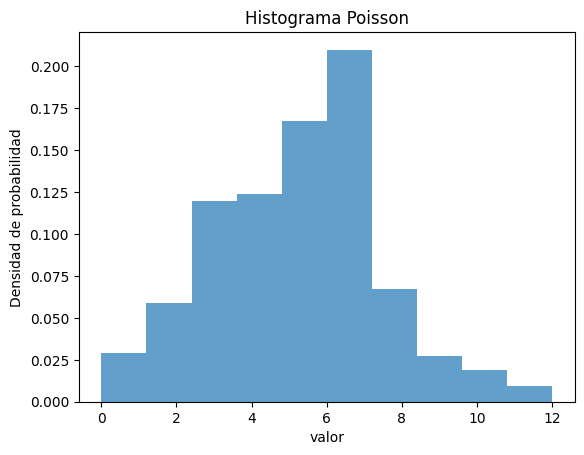

La media de la muestra es de: 5.118
La varianza de la muestra es de: 4.7940760000000004


In [5]:
# Variables
valor_lambda = 5
size = 1000

# Poisson
muestreo = np.random.poisson(valor_lambda, size)

# Tasks
plt.hist(muestreo, density=True, alpha=0.7)
plt.xlabel("valor")
plt.ylabel("Densidad de probabilidad")
plt.title("Histograma Poisson")
plt.show()

# Calcule e imprima la media y la varianza de la muestra
media = np.mean(muestreo)
varianza = np.var(muestreo)

print("La media de la muestra es de:", media)
print("La varianza de la muestra es de:", varianza)

Al ver que la media fue de 5.059 tiene cierta relación con el valor de lambda de 5 proporcionado a la distribución.
En cuanto a la varianza al tener el valor de 5.0635 que esta igual cerca de 5 lo cual dice que los valores estan distribuidos cerca de la media de la muestra. Por lo tanto el patrón es que hay tendencia de los valores a el valor de lambda.

### Ejercicio 5
1. Trace un histograma de los datos generados.
2. Compare el histograma con la PDF teórica de la distribución normal.
3. ¿La muestra generada representa con precisión la distribución normal subyacente?

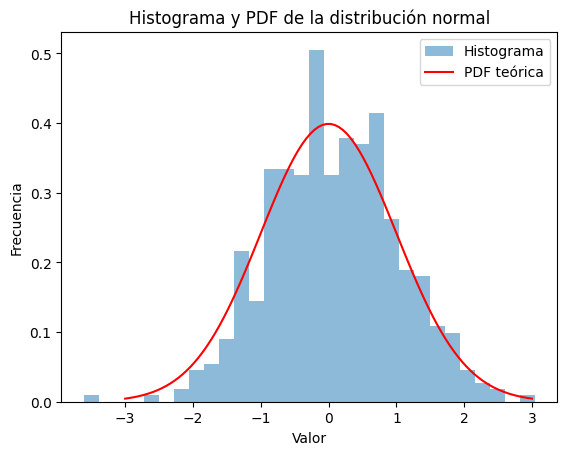

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

aleatorios = np.random.rand(500)

# Aplicar la transformación inversa para obtener valores de la distribución normal
muestreo = norm.ppf(aleatorios)

# Trazar el histograma de los datos generados
plt.hist(muestreo, bins=30, density=True, alpha=0.5, label='Histograma')

# Trazar la PDF teórica de la distribución normal
x = np.linspace(-3, 3, 100) 
pdf = norm.pdf(x)  # Calcular la PDF
plt.plot(x, pdf, 'r', label='PDF teórica')

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma y PDF de la distribución normal")
plt.legend()
plt.show()



Como la muestra sigue de cerca la forma de la PDF teórica y el histograma tiene una distribución similar, podemos decir que la muestra representa con precisión la distribución normal subyacente. Tambien al hacer otras pruebas podemos notar que cuanto mayor sea el tamaño de la muestra, mayor será la precisión de la representación.

### Ejercicio 6 
1. Utilice MLE para estimar los parámetros de forma y escala de la distribución gamma de la muestra.
2. ¿Qué tan cerca están los parámetros estimados de los parámetros verdaderos?
3. ¿Puede evaluar la bondad de ajuste de la distribución estimada a los datos observados?

### Ejercicio 7
1. Visualice los puntos de datos en un diagrama de dispersión.
2. Calcula e imprime el coeficiente de correlación entre las dos variables.
3. ¿Qué información puede obtener sobre la relación entre las variables del diagrama de dispersión y el coeficiente de correlación?

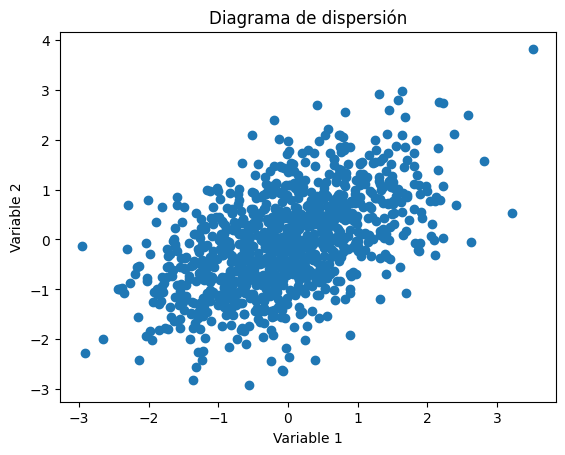

Coeficiente de correlación: 0.5169116984783997


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar la muestra aleatoria de una distribución normal bivariada
media = [0, 0]
covarianza = [[1, 0.5], [0.5, 1]]
muestra = np.random.multivariate_normal(media, covarianza, size=1000)


x = muestra[:, 0]  
y = muestra[:, 1]  
plt.scatter(x, y)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Diagrama de dispersión")
plt.show()

# Calcular e imprimir el coeficiente de correlación
coef_correlacion = np.corrcoef(x, y)[0, 1]
print("Coeficiente de correlación:", coef_correlacion)


Si nos vamos en la visualización presentada por la gráfica podemos ver que la muestra describe una cierta tendencia de relación lineal, sin embargo los datos están bastantes dispersos y no muestran dicha relación de forma clara. 

Por otra parte un coeficiente de correlación de 0.5297370564899646 sugiere que existe una relación relativamente fuerte entre las dos variables, pero no es perfecta. La fuerza de la correlación puede variar en una escala de 0 a 1, donde 0 indica una ausencia de correlación y 1 indica una correlación perfecta. Por lo tanto, un coeficiente de 0.5297370564899646 indica una correlación moderada y sugiere que las variables están relacionadas, pero puede haber cierta variabilidad en esta relación.

### Ejercicio 8 
1. Realice una prueba de bondad de ajuste de chi-cuadrado para evaluar si la muestra sigue una distribución uniforme.
2. Interprete el resultado de la prueba y saque conclusiones sobre el ajuste de los datos.
3. ¿Puede sugerir alguna modificación para mejorar la bondad de ajuste?

In [8]:
import numpy as np
from scipy.stats import chisquare


muestra = np.random.uniform(0, 1, size=500)


num_bins = 10

# Calcular las frecuencias observadas y los límites de los bins
frecuencia_observada, bins = np.histogram(muestra, bins=num_bins)

# Calcular las frecuencias esperadas
frecuencia_esperada = len(muestra) / num_bins

# Realizar la prueba de bondad de ajuste de chi-cuadrado
estadistico_chi2, p_valor = chisquare(frecuencia_observada, f_exp=frecuencia_esperada)

print("Estadístico chi-cuadrado:", estadistico_chi2)
print("p-valor:", p_valor)


Estadístico chi-cuadrado: 14.68
p-valor: 0.10010924637753339


Un valor mayor del estadístico chi-cuadrado indica una mayor discrepancia entre los datos observados y los esperados.
En este caso, el estadístico chi-cuadrado obtenido es de 10.92. Como regla general, un valor bajo del estadístico chi-cuadrado indica un mejor ajuste de los datos a la distribución teórica.
Dado que el estadístico chi-cuadrado obtenido no es excesivamente alto, esto sugiere que los datos pueden ajustarse razonablemente bien a la distribución uniforme esperada.

De acuerdo con los resultados obtenidos podemos notear que los datos se ajustan razonablemente bien a la distribución uniforme esperada. Sin embargo, si se desea mejorar aún más la bondad de ajuste, se puede considerar aumentar el tamaño de la muestra y ajustar el número de bins para obtener una representación más precisa y detectar posibles desviaciones.